In [68]:
from bisect import bisect_left
from graphviz import Digraph

In [69]:
class Noeud234:
    def __init__(self, cles, arbres=None, parent=None):
        self.cles = cles      # Liste des clés
        self.arbres = arbres  # Liste des sous-arbres
        self.parent = parent

In [70]:
class Arbre234:
    def __init__(self, noeud=None):
        self.racine = noeud
        self.ecrGauche = None
        # sert à savoir si l'ajout continue dans le fils gauche ou dans le fils droit après éclatement
        # True pour le fils gauche sinon c'est le fils droit


    def ajout(self, x):
        '''Arbre234 * int -> Arbre234
        Renvoie l'arbre après l'ajout de x'''
        if self._est_vide():
            return Arbre234(Noeud234([x]))
        
        return self._ajout(x)
    

    def recherche(self, x):
        '''Arbre234 * int -> Arbre234
        Renvoie l'arbre contenant x sinon None'''
        if self._est_feuille() and not self._contient(x):
            return None
        
        if self._contient(x):
            return self
        
        if x < self._contenu()[0]:
            return self._sous_arbres()[0].Recherche(x)
        elif self._degre() == 2 or x < self._contenu()[1]:
            return self._sous_arbres()[1].Recherche(x)
        elif self._degre() == 3 or x < self._contenu()[2]:
            return self._sous_arbres()[2].Recherche(x)
        else:
            return self._sous_arbres()[3].Recherche(x)
        

    def supprime(self, x):
        '''Arbre234 * int -> Arbre234
        Renvoie l'arbre après la suppression de x'''
        if self._est_vide():
            return Arbre234()
            
        if self._est_feuille():
            if self._degre() == 2 and self._contient(x):
                return Arbre234()
        
        else: # Cas où la fusion est nécessaire entre la racine et ses fils
            G = self._sous_arbres()[0]
            D = self._sous_arbres()[1]
            if self._degre() == 2 and G._degre() == 2 and D._degre() == 2:
                self.racine = self._fusion(G, D)

        return self._supprime(x)
    

    def construction(self, liste):
        '''Arbre234 * list -> Arbre234
        Renvoie l'arbre après l'ajout des éléments de la liste'''
        for x in liste:
            self = self.ajout(x)
        return self
    

    def afficher_arbre(self, niveau=0):
        '''Arbre234 * int -> None
        Affiche l'arbre dans le terminal'''
        if self.racine is not None:
            print("  " * niveau, self._contenu())
            if not self._est_feuille():
                for sous_arbre in self._sous_arbres():
                    sous_arbre.afficher_arbre(niveau + 1)


    def visualiser_arbre(self):
        '''Arbre234 -> None
        Visualiser l'arbre avec Graphviz'''
        def creer_label_noeud(A):
            '''Arbre234 -> str'''
            noeud_label = ""
            sections = []

            # Commencer par un espace vide pour les sous-arbres
            sections.append(f' <f0> ')

            # Ajouter les clés et les espaces vides pour les sous-arbres entre chaque clé
            for i, cle in enumerate(A._contenu()):
                sections.append(f' <f{i*2+1}> {str(cle)} ')
                sections.append(f' <f{i*2+2}> ')

            noeud_label = '|'.join(sections)
            return noeud_label
        
        def ajouter_noeuds_et_arcs(A, graph, parent_id=None, parent_port=''):
            '''Arbre234 * Digraph * str * str -> None'''
            if A._est_vide():
                return
            
            noeud_label = creer_label_noeud(A)
            noeud_id = f'node{abs(hash(A)) % (10 ** 8)}'  # Génère un ID unique plus court
            graph.node(noeud_id, label=noeud_label)

            if parent_id is not None and parent_port != '':
                graph.edge(f'{parent_id}:{parent_port}', noeud_id)

            if A._est_feuille():
                return

            sous_arbres = A._sous_arbres()
            for i, arbre in enumerate(sous_arbres):
                port = f'f{i*2}'  # Connecter aux ports des sous-arbres
                ajouter_noeuds_et_arcs(arbre, graph, noeud_id, port)

        g = Digraph('G', node_attr={'shape': 'record', 'height': '.1'})
        ajouter_noeuds_et_arcs(self, g)
        return g

## Primitive

In [71]:
def _est_vide(self):
    '''Arbre234 -> bool'''
    return self.racine is None


def _est_feuille(self):
    '''Arbre234 -> bool'''
    return self._sous_arbres() is None


def _contenu(self):
    '''Arbre234 -> list[int]
    Retourne la liste des clés de l'arbre'''
    return self.racine.cles


def _sous_arbres(self):
    '''Arbre234 -> list[Arbre234]
    Retourne la liste des sous-arbres de l'arbre'''
    return self.racine.arbres
    

def _pere(self):
    '''Arbre234 -> Arbre234'''
    return self.racine.parent


def _degre(self):
    '''Arbre234 -> int'''
    return len(self._contenu()) + 1


def _contient(self, x):
    '''Arbre234 * int -> bool'''
    return x in self._contenu()
    

def _index(self):
    '''Arbre234 -> int
    Retourne la position de l'arbre dans son père'''
    if self._pere() is None:
        return -1
    
    return self._pere()._sous_arbres().index(self)


def _duplique(self, parent=None):
    '''Arbre234 -> Arbre234
    Retourne une copie de l'arbre'''
    if self._est_feuille():
        return Arbre234(Noeud234(self._contenu().copy(), parent=parent))
    
    A = Arbre234()
    sous_arbres = []
    contenus = self._contenu().copy()
    for i in range(self._degre()):
        sous_arbres.append(self._sous_arbres()[i]._duplique(A))
    A.racine = Noeud234(contenus, sous_arbres, parent)
    return A


def _insertion_triee(self, x):
    '''Arbre234 * int -> None
    Insère x dans la liste des clés de l'arbre'''
    indice = bisect_left(self._contenu(), x)
    self._contenu().insert(indice, x)
    return indice


# Ajout des fonctions aux méthodes de la classe Arbre234
Arbre234._est_vide = _est_vide
Arbre234._est_feuille = _est_feuille
Arbre234._contenu = _contenu
Arbre234._sous_arbres = _sous_arbres
Arbre234._pere = _pere
Arbre234._degre = _degre
Arbre234._contient = _contient
Arbre234._index = _index
Arbre234._duplique = _duplique
Arbre234._insertion_triee = _insertion_triee

## Fonction auxiliaire ajout

In [72]:
def _ajout(self, x, parent=None):
    '''Arbre234 * int * Arbre234-> Arbre234'''
    if self._contient(x):
        return self._duplique(parent)
    
    if self._degre() == 4:
        self.racine = self._eclatement_descente(x, parent)

    if self._est_feuille():
        A = self._duplique(parent)
        A._insertion_triee(x)
        return A
    
    A = Arbre234(Noeud234(self._contenu().copy(), [], parent))
    indice = bisect_left(A._contenu(), x)

    # On duplique les sous arbres sauf celui qui va être modifié
    for (i, a) in enumerate(self._sous_arbres()):
        if i != indice:
            A._sous_arbres().append(a._duplique(A))
        else:
            SousA = a._ajout(x, A)
            if A.ecrGauche:
                A.ecrGauche = None # Insère x dans le fils gauche après éclatement
                A._sous_arbres().insert(indice, SousA)
            else:
                A._sous_arbres().append(SousA) # Insère x dans le fils droit après éclatement       
    return A

def _eclatement_descente(self, x, parent=None):
    '''Arbre234 -> Noeud234'''
    G = Arbre234()
    D = Arbre234()

    if self._est_feuille():
        G.racine = Noeud234([self._contenu()[0]], parent=parent)
        D.racine = Noeud234([self._contenu()[2]], parent=parent)

    else:
        G.racine = Noeud234([self._contenu()[0]], [self._sous_arbres()[0], self._sous_arbres()[1]], parent=parent)
        D.racine = Noeud234([self._contenu()[2]], [self._sous_arbres()[2], self._sous_arbres()[3]], parent=parent)
        self._sous_arbres()[0].racine.parent = G
        self._sous_arbres()[1].racine.parent = G
        self._sous_arbres()[2].racine.parent = D
        self._sous_arbres()[3].racine.parent = D

    if parent is None: # Eclatement à la racine
        return Noeud234([self._contenu()[1]], [G, D])
    
    # Eclatement d'un noeud autre que la racine
    indice = parent._insertion_triee(self._contenu()[1])
    if x < self._contenu()[1]:
        D.racine.parent = parent
        parent._sous_arbres().insert(indice, D)
        parent.ecrGauche = True
        return G.racine
    
    G.racine.parent = parent
    parent._sous_arbres().insert(indice, G)
    return D.racine

# Ajout des fonctions aux méthodes de la classe Arbre234
Arbre234._eclatement_descente = _eclatement_descente
Arbre234._ajout = _ajout

## Fonction auxiliaire supprime

In [73]:
def _supprime(self, x, parent=None):
    '''Arbre234 * int -> Arbre234'''
    if self._est_feuille():
        if self._contient(x):
            if self._degre() > 2:
                A = self._duplique(parent)
                A._contenu().remove(x)
                return A
            
            else:
                VG = self._frere_gauche()
                VD = self._frere_droit()
                if VG is None:
                    if VD is None: # Cas où l'arbre est la racine avec qu'un élément, déjà traité dans supprime
                        pass
                    
                    else:
                        if VD._degre() > 2: # Cas où self est le plus à gauche et qu'il peut emprunter à son voisin droit
                            monte = VD._cle_minimale()
                            self._emprunt(VD, 0, monte)

                        else:  # Cas où self est le plus à gauche et qu'il ne peut pas emprunter
                            self.racine = parent._fusion(self, VD, 0)

                else:
                    if VG._degre() > 2: # Cas où self peut emprunter à son voisin gauche
                        monte = VG._cle_maximale()
                        self._emprunt(VG, VG._index(), monte)

                    else:
                        if VD is None: # Cas où self est le plus à droite et qu'il ne peut pas emprunter
                            self.racine = parent._fusion(VG, self, VG._index())

                        else:
                            if VD._degre() > 2: # Cas où self peut emprunter à son voisin droit et qu'il ne peut pas emprunter à son voisin gauche
                                monte = VD._cle_minimale()
                                self._emprunt(VD, self._index(), monte)

                            else: # Cas où self ne peut pas emprunter à ses voisins
                                self.racine = parent._fusion(VG, self, VG._index())
                                
                return self._supprime(x, parent)
                        
        else: # x n'a pas été trouvé
            return self._duplique(parent)
    
    else:
        A = Arbre234(Noeud234(self._contenu().copy(), [], parent))
        if self._contient(x): # x se trouve dans un noeud interne
            indice = A._contenu().index(x)
            for (_, a) in enumerate(self._sous_arbres()):
                A._sous_arbres().append(a._duplique(A))

            G = A._sous_arbres()[indice]
            D = A._sous_arbres()[indice + 1]
            if not G._est_arbre_minimal():
                # la suppression est possible dans le sous_arbre gauche
                # et on supprime la clé maximale, qui se trouve dans les feuilles
                max = G._cle_maximale()
                A._contenu()[indice] = max
                A._sous_arbres()[indice] = G._supprime(max, A)

            elif not D._est_arbre_minimal():
                # idem pour le sous_arbre droit
                min = D._cle_minimale()
                A._contenu()[indice] = min
                A._sous_arbres()[indice + 1] = D._supprime(min, A)

            else: # Impossible d'emprunter il faut fusionner
                D.racine = A._fusion(G, D, indice)
                A._sous_arbres()[indice] = D._supprime(x, A)

        else:
            indice = bisect_left(A._contenu(), x)
            indiceNonMinimal = None # récupérer l'indice d'un sous-arbre non minimal
            for (i, a) in enumerate(self._sous_arbres()):
                if i != indice:
                    A._sous_arbres().append(a._duplique(A))
                    if not a._est_arbre_minimal():
                        indiceNonMinimal = i
                else:
                    a.racine.parent = A
                    A._sous_arbres().append(a)
            
            sousA = A._sous_arbres()[indice]
            if sousA._est_arbre_minimal() and not sousA._est_feuille():
                if indiceNonMinimal is None:
                    # Tous minimal, on fusionne donc les 2 premiers sous-arbres
                    A._sous_arbres()[0].racine = A._fusion(A._sous_arbres()[0], A._sous_arbres()[1], 0)
                    return A._supprime(x, parent)

                if indiceNonMinimal > indice:
                    # self se trouve à gauche de l'arbre non minimal, on transfère une clé de droite à gauche
                    for i in range(indiceNonMinimal, indice, -1):
                        VD = A._sous_arbres()[i]
                        min = VD._cle_minimale()
                        cleATransferer = A._contenu()[i-1]
                        A._sous_arbres()[i] = VD._supprime(min, A)
                        A._contenu()[i-1] = min
                        A._sous_arbres()[i-1] = A._sous_arbres()[i-1]._ajout(cleATransferer, A)._supprime(x, A)
                else:
                    # self se trouve à droite de l'arbre non minimal, on transfère une clé de gauche à droite
                    for i in range(indiceNonMinimal, indice):
                        VG = A._sous_arbres()[i]
                        max = VG._cle_maximale()
                        cleATransferer = A._contenu()[i]
                        A._sous_arbres()[i] = VG._supprime(max, A)
                        A._contenu()[i] = max
                        A._sous_arbres()[i+1] = A._sous_arbres()[i+1]._ajout(cleATransferer, A)._supprime(x, A)
                return A      

            # Cas récursif
            sousA = A._sous_arbres()[indice]._supprime(x, A)
            indice = bisect_left(A._contenu(), sousA._cle_minimale()) # On a retiré un arbre lors de l'éclatement
            A._sous_arbres()[indice] = sousA

        return A


def _emprunt(self, V, i, monte):
    descend = self._pere()._contenu()[i]
    V._contenu().remove(monte)
    self._pere()._contenu()[i] = monte
    self._contenu().append(descend)


def _est_arbre_minimal(self):
    if self._est_feuille():
        return self._degre() == 2
    else:
        if self._degre() == 2:
            return self._sous_arbres()[0]._est_arbre_minimal() and self._sous_arbres()[1]._est_arbre_minimal()
        else:
            return False
        

def _fusion(self, G, D, i=None):
    g = G._contenu()[0]
    d = D._contenu()[0]
    sous_arbres = None

    if not G._est_feuille():
        sous_arbres = [G._sous_arbres()[0], G._sous_arbres()[1], D._sous_arbres()[0], D._sous_arbres()[1]]

    if self._pere() is None and self._degre() == 2:
        return Noeud234([g, self._contenu()[0], d], sous_arbres)
    
    p = self._contenu()[i]
    self._sous_arbres().remove(G)
    self._contenu().remove(p)
    return Noeud234([g, p, d], sous_arbres, self)


def _cle_minimale(self):
    '''Arbre234 -> int
    Retourne la plus petite clé de l'arbre'''
    if self._est_feuille():
        return self._contenu()[0]
    
    return self._sous_arbres()[0]._cle_minimale()


def _cle_maximale(self):
    '''Arbre234 -> int
    Retourne la plus grande clé de l'arbre'''
    if self._est_feuille():
        return self._contenu()[self._degre() - 2]
    
    return self._sous_arbres()[self._degre() - 1]._cle_maximale()


def _frere_gauche(self):
    '''Arbre234 -> Arbre234'''
    position = self._index()

    if position == 0 or position == -1:
        return None
    
    return self._pere()._sous_arbres()[position - 1]


def _frere_droit(self):
    '''Arbre234 -> Arbre234'''
    position = self._index()
    lePlusADroite = self._pere()._degre() - 1

    if position == lePlusADroite or position == -1:
        return None
    
    return self._pere()._sous_arbres()[position + 1]


# Ajout des fonctions aux méthodes de la classe Arbre234
Arbre234._supprime = _supprime
Arbre234._emprunt = _emprunt
Arbre234._est_arbre_minimal = _est_arbre_minimal
Arbre234._fusion = _fusion
Arbre234._cle_minimale = _cle_minimale
Arbre234._cle_maximale = _cle_maximale
Arbre234._frere_gauche = _frere_gauche
Arbre234._frere_droit = _frere_droit

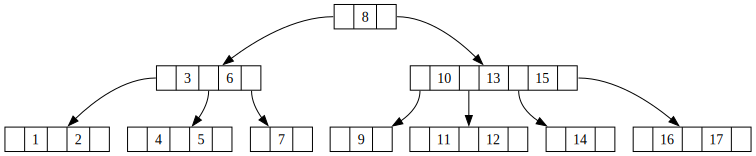

In [74]:
A = Arbre234()
A = A.ajout(8)
A = A.ajout(3)
A = A.ajout(2)
A = A.ajout(4)
A = A.ajout(1)
A = A.ajout(15)
A = A.ajout(10)
A = A.ajout(9)


A = A.ajout(11)
A = A.ajout(7)
A = A.ajout(6)
A = A.ajout(13)
A = A.ajout(12)
A = A.ajout(5)
A = A.ajout(14)
A = A.ajout(16)
A = A.ajout(17)

A.visualiser_arbre()

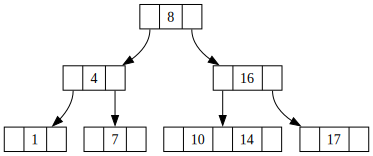

In [75]:
A = A.supprime(6)
A = A.supprime(5)
A = A.supprime(3)
A = A.supprime(2)
A = A.supprime(9)
A = A.supprime(11)
A = A.supprime(13)
A = A.supprime(15)
A = A.supprime(12)
# A = A.supprime(14)

A.visualiser_arbre()

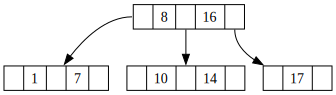

In [76]:
A = A.supprime(4)

A.visualiser_arbre()

## Test avec un grand arbre

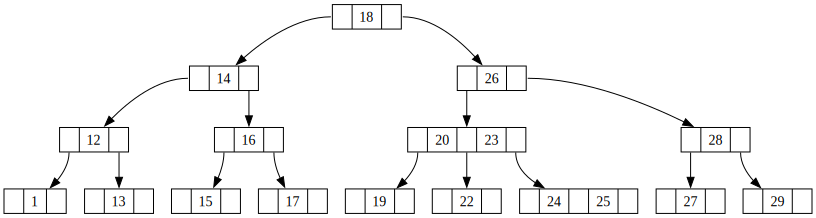

In [77]:
B = Arbre234()
B = B.construction([8, 3, 2, 4, 1, 15, 10, 9, 11, 7, 6, 13, 12, 5, 14, 16, 17, 25, 30, 22, 23, 24, 26, 27, 28, 29, 18, 19, 20, 21])
B = B.supprime(6)
B = B.supprime(3)
B = B.supprime(11)
B = B.supprime(2)
B = B.supprime(4)

B = B.supprime(10)
B = B.supprime(9)
B = B.supprime(7)
B = B.supprime(8)
B = B.supprime(5)
B = B.supprime(21)
B = B.supprime(30)

B.visualiser_arbre()


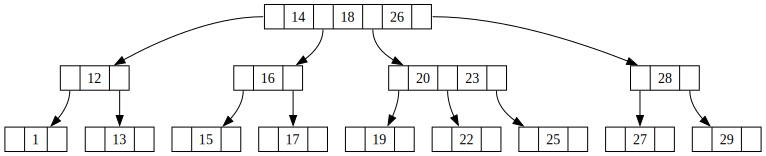

In [78]:
B = B.supprime(24)

B.visualiser_arbre()

In [79]:
def papa(A):
    if A._pere() is not None:
        print(A._contenu(), A._pere()._contenu())
    if not A._est_feuille():
        for (i, a) in enumerate(A._sous_arbres()):
            papa(a)

papa(B)

[12] [14, 18, 26]
[1] [12]
[13] [12]
[16] [14, 18, 26]
[15] [16]
[17] [16]
[20, 23] [14, 18, 26]
[19] [20, 23]
[22] [20, 23]
[25] [20, 23]
[28] [14, 18, 26]
[27] [28]
[29] [28]
